In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 1. 문제정의
- 500명의 키와 몸무게, 비만도 라벨을 통해서 비만을 판단하는 모델을 만들어보자

# 2. 데이터 수집
- bmi_500.csv 불러오기

In [4]:
data= pd.read_csv("bmi_500.csv",index_col = 'Label') # label컬럼 인덱스로 만들기
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [8]:
# 인덱서를 사용해서 
# 인덱서 : 데이터 프레임에서 행/열단위로 데이터를 불러오기
# loc인덱서:[행,열] 행과 열에 대한 이름 data.loc['Overweight','Height']
# iloc인덱서: [행,열] 행과 열에대한 번호 data.iloc[3,1]
# lavel 이 normal 인것만 출력하기
data.loc['Normal',:] # :은 전체라는 의미

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


# 3.데이터 전처리

In [10]:
# 결측치, 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [11]:
# 기술통계 확인, 이상치 여부
data.describe() 

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 4. 탐색적 데이터 분석(EDA)
- 각 비만도 등급별로 시각화

In [25]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

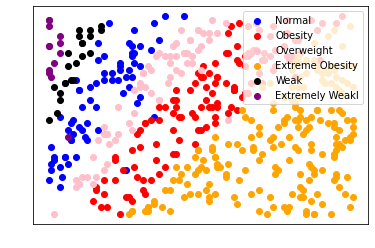

In [33]:
# normal 만 시각화
data_normal = data.loc['Normal', :]
data_obesity = data.loc['Obesity']
data_overweight = data.loc['Overweight']
data_ExtremeObesity = data.loc['Extreme Obesity']
data_weak = data.loc['Weak']
data_ExtremelyWeak=data.loc['Extremely Weak']
plt.scatter(data_normal['Weight'],# X축 데이터
            data_normal['Height'], #y축 데이터
            c='blue',
            label = 'Normal')
plt.scatter(data_obesity['Weight'],# X축 데이터
            data_obesity['Height'], #y축 데이터
            c='red',
            label = 'Obesity')
plt.scatter(data_overweight['Weight'],# X축 데이터
            data_overweight['Height'], #y축 데이터
            c='pink',
            label = 'Overweight')
plt.scatter(data_ExtremeObesity['Weight'],# X축 데이터
            data_ExtremeObesity['Height'], #y축 데이터
            c='orange',
            label = 'Extreme Obesity')
plt.scatter(data_weak['Weight'],# X축 데이터
            data_weak['Height'], #y축 데이터
            c='black',
            label = 'Weak')
plt.scatter(data_ExtremelyWeak['Weight'],# X축 데이터
            data_ExtremelyWeak['Height'], #y축 데이터
            c='purple',
            label = 'Extremely Weakl')
plt.tick_params(axis = 'x', labelcolor = 'w',color='w')
plt.tick_params(axis = 'y', labelcolor = 'w',color='w')
plt.legend(loc='upper right') # ㅣabel 띄우기
plt.show()           

In [31]:
def drawScatter(label , color):
    data_scatter = data.loc[label, :]
    plt.scatter(data_scatter['Weight'],# X축 데이터
            data_scatter['Height'], #y축 데이터
            c=color,
            label = label)


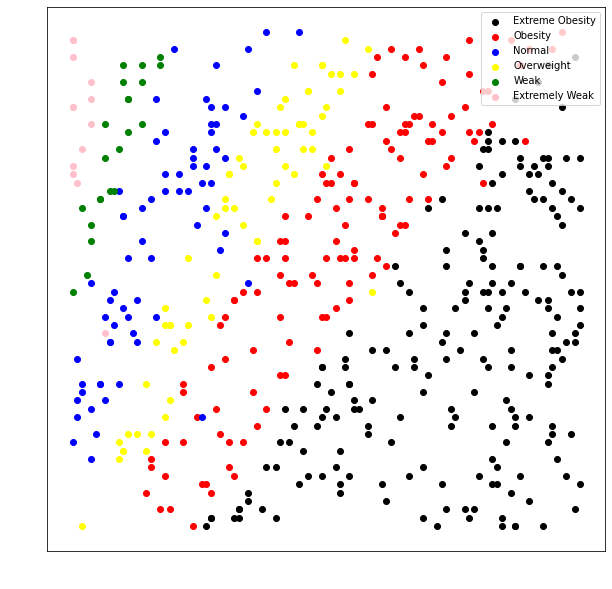

In [42]:
#'Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
#       'Extremely Weak'
plt.figure(figsize = (10,10)) #그래프 크깅
drawScatter('Extreme Obesity','black')
drawScatter('Obesity','red')
drawScatter('Normal','blue')
drawScatter('Overweight','yellow')
drawScatter('Weak','green')
drawScatter('Extremely Weak','pink')

plt.legend(loc='upper right')
plt.tick_params(axis = 'x', labelcolor = 'w',color='w')
plt.tick_params(axis = 'y', labelcolor = 'w',color='w')
plt.xlabel('Weight',color='w') # X축 이름 : Weight
plt.ylabel('Height',color='w') # y축 이름 : Height
plt.show()

# 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [48]:
# 문제 / 정답
data = pd.read_csv('bmi_500.csv')
data.head()


,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [104]:
X=data.loc[:,'Height':'Weight'] #문제

In [54]:
y = data.loc[:,'Label'] #정답

In [57]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [58]:
# 훈련 / 평가
# 70 /  30
# 350  150

X_train = X.iloc[:350,:]
X_test = X.iloc[350:,:]
y_train = y.iloc[:350,]
y_test = y.iloc[350:]

In [59]:
#knn 모델 사용
knn=KNeighborsClassifier(n_neighbors=7)

# 6.학습

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# 7.평가

In [62]:
print('train score:',knn.score(X_train,y_train))
print('test score : ',knn.score(X_test,y_test))

train score: 0.9028571428571428
test score :  0.9


In [63]:
knn.predict([[174,67],[180,80]])

array(['Normal', 'Overweight'], dtype=object)

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3,test_size=0.3)

In [66]:
X_train

,Height,Weight
98,195,69
401,174,107
452,169,121
166,176,109
218,141,126
...,...,...
440,172,116
131,187,70
249,161,89
152,150,60


In [67]:
y_train

98                Weak
401            Obesity
452    Extreme Obesity
166            Obesity
218    Extreme Obesity
            ...       
440            Obesity
131             Normal
249            Obesity
152         Overweight
362    Extreme Obesity
Name: Label, Length: 350, dtype: object

In [68]:
train_list=[]
for k in range(1,101):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    train_list.append(model.score(X_train,y_train))

In [69]:
train_list

[1.0,
 0.94,
 0.9485714285714286,
 0.9142857142857143,
 0.9314285714285714,
 0.9114285714285715,
 0.9085714285714286,
 0.9142857142857143,
 0.9228571428571428,
 0.9142857142857143,
 0.92,
 0.9085714285714286,
 0.9171428571428571,
 0.9,
 0.9,
 0.8971428571428571,
 0.9,
 0.9,
 0.8742857142857143,
 0.8571428571428571,
 0.8657142857142858,
 0.8542857142857143,
 0.8571428571428571,
 0.8514285714285714,
 0.8514285714285714,
 0.8428571428571429,
 0.8428571428571429,
 0.8428571428571429,
 0.8285714285714286,
 0.8342857142857143,
 0.8342857142857143,
 0.84,
 0.8285714285714286,
 0.8257142857142857,
 0.8228571428571428,
 0.8228571428571428,
 0.8057142857142857,
 0.8057142857142857,
 0.8057142857142857,
 0.8,
 0.8028571428571428,
 0.8114285714285714,
 0.8142857142857143,
 0.8085714285714286,
 0.8085714285714286,
 0.8171428571428572,
 0.8114285714285714,
 0.8142857142857143,
 0.8085714285714286,
 0.8142857142857143,
 0.7885714285714286,
 0.7914285714285715,
 0.7914285714285715,
 0.7828571428571428

In [71]:
test_list=[]
for k in range(1,101):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    test_list.append(model.score(X_test,y_test))

In [72]:
test_list

[0.8933333333333333,
 0.8866666666666667,
 0.9066666666666666,
 0.88,
 0.94,
 0.9266666666666666,
 0.9066666666666666,
 0.9133333333333333,
 0.8933333333333333,
 0.8866666666666667,
 0.9,
 0.8866666666666667,
 0.9,
 0.8866666666666667,
 0.8866666666666667,
 0.8866666666666667,
 0.8733333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.8866666666666667,
 0.8933333333333333,
 0.9,
 0.88,
 0.8866666666666667,
 0.8733333333333333,
 0.8733333333333333,
 0.8733333333333333,
 0.8466666666666667,
 0.84,
 0.84,
 0.8533333333333334,
 0.8533333333333334,
 0.8266666666666667,
 0.8466666666666667,
 0.8333333333333334,
 0.8466666666666667,
 0.8333333333333334,
 0.82,
 0.8266666666666667,
 0.84,
 0.84,
 0.8466666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.82,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.82,
 0.8133333333333334,
 0.8066666666666666,
 0.8066666666666666,
 0.8,
 0.8133333333333334,
 0.

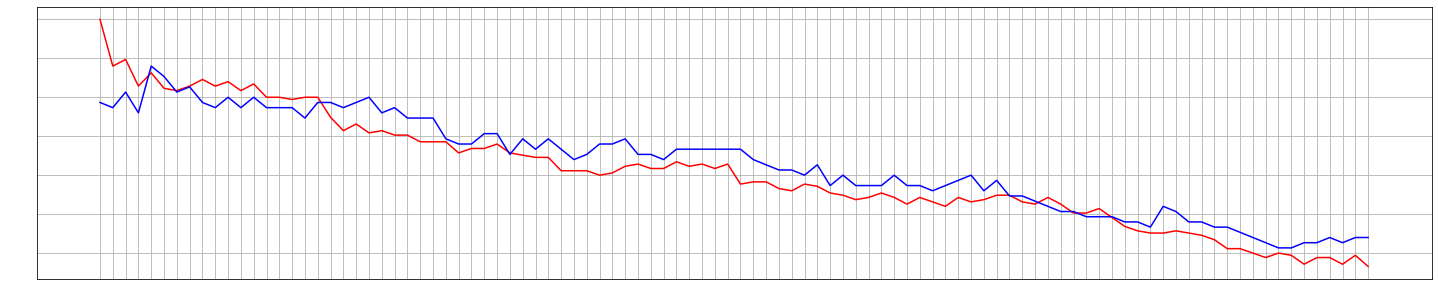

In [75]:
plt.figure(figsize=(25,5))
plt.plot(range(1,101),
        train_list,
        c='red')
plt.plot(range(1,101),
        test_list,
        c='blue')
plt.xticks(range(1,101))
plt.tick_params(axis='x',labelcolor='w',color='w')
plt.tick_params(axis='y',labelcolor='w',color='w')
plt.grid()
plt.show()

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
knn.score(X_test,y_test)

0.94

In [83]:
knn.predict([[179,78]])

array(['Normal'], dtype=object)